# libraries

In [ ]:
!pip install Sastrawi
!pip install contractions

     |████████████████████████████████| 209 kB 12.0 MB/s 
     |████████████████████████████████| 284 kB 13.2 MB/s 
     |████████████████████████████████| 321 kB 47.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85453 sha256=95b7ee76086a0070667ad4acd4ea2e859e0253aba97ab0b9b5da5bc61086b5b5
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
#import needed libraries
import re
import string
import unicodedata
import nltk
import inflect
import pickle
import contractions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, initializers
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Concatenate, Input, Embedding, LSTM, Attention, Dense, Dropout, Bidirectional, LSTM, Flatten, Conv1D, GlobalMaxPool1D, MaxPool1D, Reshape, GlobalAveragePooling1D, UpSampling1D, Layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from datetime import datetime

from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Embedding, Dropout, LSTM, Bidirectional, GRU, GlobalMaxPool1D
from keras.utils.np_utils import to_categorical
from keras.backend import clear_session

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.7.0


In [ ]:
import xlrd

# preprocessing func

In [ ]:
#removes html
def strip_html(text):
  soup = BeautifulSoup(text, "html.parser")
  return soup.get_text()
  
#remove between square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#eliminates contractions
def replace_contractions(text):
  """Replace contactions in string of text"""
  return contractions.fix(text)

#denoise text
def denoise_text(text):
  text = strip_html(text)
  text = remove_between_square_brackets(text)
  text = replace_contractions(text)
  return text

In [ ]:
factoryStopword = StopWordRemoverFactory()
stopword = factoryStopword.create_stop_word_remover()
stop_factory = StopWordRemoverFactory().get_stop_words()

def get_stopwords():
  docs = pd.read_csv('/content/stopwords-id.txt', header = None, names= ['stopword'])
  docs = docs['stopword'].tolist()
  return docs

stop_words = get_stopwords()

# Merge stopword
data = set(stop_factory + stop_words)

#remove stopword
def removeStopword(str):
    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in data]
    return ' '.join(filtered_sentence)

In [ ]:
#cleaning dataset
def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    str = re.sub("b'|b\"",'',str)
    #remove username inside brackets
    str = re.sub('SENSITIVE-NO',' ',str) 
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    return str

In [ ]:
#remove twitter symbols
def remove_symbols(str):
  #remove RT
  str = re.sub ('RT', '', str)
  #remove @username
  str = re.sub('@[^\s]+', '', str)
  return str

In [ ]:
#normalization of words
normalisasi = pd.read_csv('kamus.csv', encoding = 'latin-1')
normalisasi_map = dict(zip(normalisasi['original'], normalisasi['replacement']))
def normalizing(text):
  return ' '.join([normalisasi_map[word] if word in normalisasi_map else word for word in text.split(' ')])

In [ ]:
factoryStemmer = StemmerFactory()
stemmer = factoryStemmer.create_stemmer()

def stemming(text):
  return stemmer.stem(text)

In [ ]:
#preprocessing dataset function
def preprocessing(str):
  str = remove_symbols(str)
  str = denoise_text(str)
  str = normalizing(str)
  str = cleaning(str)
  #str = stemming(str)
  str = normalizing(str)
  str = cleaning(str)
  return str

In [ ]:
print(preprocessing('Gelatine Sheet (Bronze) / Gelatine lembaran HALAL (PER 5 LEMBAR) <br><br> @sere_nity'))
print(preprocessing('polisi tembak mati kurir narkotika psikotropika dan obat larang temu kg sabu pil inex gudang narkotika sidoarjo tribunnews.com'))
print(preprocessing('Dokter Sebut Penanganan Rekonstruksi Bayi Dina Oktavia akan Dilakukan Sampai Usia 17 tahun - Halaman 4 - www.tribunnews.com'))
print(preprocessing('Misteri Kematian Hakim Jamaluddin Saat Akan Bercerai, Istri Sudah 7 Kali Diperiksa Polisi - www.voaindonesia.com'))
print(preprocessing('uuuu neo coffee (nctzen/neotizen comment beautiful grass 🤩)'))
print(preprocessing('mengsedih'))

gelatine sheet bronze gelatine lembaran halal per lembar
polisi tembak mati kurir narkotika psikotropika dan obat larang temu kg sabu pil inex gudang narkotika sidoarjo tribunnews com
dokter sebut penanganan rekonstruksi bayi dina oktavia akan dilakukan sampai usia tahun halaman
misteri kematian hakim jamaluddin saat akan bercerai istri sudah kali diperiksa polisi
uuuu neo coffee nctzen neotizen komen cantik grass
mengsedih


# modeling

In [ ]:
#import needed libraries
import re
import string
import unicodedata
import nltk
import inflect
import pickle
import contractions
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk import tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, initializers
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Concatenate, Input, Embedding, LSTM, Attention, Dense, Dropout, Bidirectional, LSTM, Flatten, Conv1D, GlobalMaxPool1D, MaxPool1D, Reshape, GlobalAveragePooling1D, UpSampling1D, Layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from datetime import datetime

from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Embedding, Dropout, LSTM, Bidirectional, GRU, GlobalMaxPool1D
from keras.utils.np_utils import to_categorical
from keras.backend import clear_session

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
print(keras.__version__)
print(tensorflow.__version__)

2.7.0
2.7.0


In [ ]:
#load data
df = pd.read_excel('/content/anteraja.xlsx')
df

,text,pos,ytrue
0,haha ternyata paketnya rusak dahlah tidak perl...,neu,neg
1,min tolong cek direct message dong saya ada ke...,pos,neg
2,aku pakai anteraja huhu mantappp,neg,pos
3,iya padahal aku order di desember juga kalau m...,neg,pos
4,tapi kamu pakai tokped gratis ongkirnya masih ...,pos,neu
...,...,...,...
3022,mencari ceperan begitu amat iya katanya idaman...,neu,neg
3023,pernah dengar kan digebuki polisi seasrama tap...,pos,neg
3024,bagaimana paket saya masa statusnya sudah dite...,neu,neg
3025,tolong bantu usut pak oknum tersebut rekan kit...,pos,pos


In [ ]:
# delete unused column
df = df.drop(columns = ['pos'])
df

,text,ytrue
0,haha ternyata paketnya rusak dahlah tidak perl...,neg
1,min tolong cek direct message dong saya ada ke...,neg
2,aku pakai anteraja huhu mantappp,pos
3,iya padahal aku order di desember juga kalau m...,pos
4,tapi kamu pakai tokped gratis ongkirnya masih ...,neu
...,...,...
3022,mencari ceperan begitu amat iya katanya idaman...,neg
3023,pernah dengar kan digebuki polisi seasrama tap...,neg
3024,bagaimana paket saya masa statusnya sudah dite...,neg
3025,tolong bantu usut pak oknum tersebut rekan kit...,pos


In [ ]:
# dropping nan columns
df = df.dropna()

In [ ]:
df

,text,ytrue
0,haha ternyata paketnya rusak dahlah tidak perl...,neg
1,min tolong cek direct message dong saya ada ke...,neg
2,aku pakai anteraja huhu mantappp,pos
3,iya padahal aku order di desember juga kalau m...,pos
4,tapi kamu pakai tokped gratis ongkirnya masih ...,neu
...,...,...
3022,mencari ceperan begitu amat iya katanya idaman...,neg
3023,pernah dengar kan digebuki polisi seasrama tap...,neg
3024,bagaimana paket saya masa statusnya sudah dite...,neg
3025,tolong bantu usut pak oknum tersebut rekan kit...,pos


In [ ]:
len(df)

1662

In [ ]:
# detect duplicate data
df.duplicated().sum()

0

In [ ]:
#delete duplicated data
df = df.drop_duplicates(subset = 'text', keep = 'last')
df.duplicated().sum()

0

In [ ]:
# reset index
df = df.reset_index(drop=True)
df

,text,ytrue
0,haha ternyata paketnya rusak dahlah tidak perl...,neg
1,min tolong cek direct message dong saya ada ke...,neg
2,aku pakai anteraja huhu mantappp,pos
3,iya padahal aku order di desember juga kalau m...,pos
4,tapi kamu pakai tokped gratis ongkirnya masih ...,neu
...,...,...
1657,mencari ceperan begitu amat iya katanya idaman...,neg
1658,pernah dengar kan digebuki polisi seasrama tap...,neg
1659,bagaimana paket saya masa statusnya sudah dite...,neg
1660,tolong bantu usut pak oknum tersebut rekan kit...,pos


In [ ]:
#convert label string to categorical
df.dropna(inplace = True)
df['label_id'] = df['ytrue'].factorize()[0]
kategori_id = df[['ytrue', 'label_id']].drop_duplicates().sort_values('label_id')
kategori_to_id = dict(kategori_id.values)
id_to_kategori = dict(kategori_id[['label_id', 'ytrue']].values)

#show data id_to_kategori
id_to_kategori

{0: 'neg', 1: 'pos', 2: 'neu'}

pos    781
neu    474
neg    407
Name: ytrue, dtype: int64

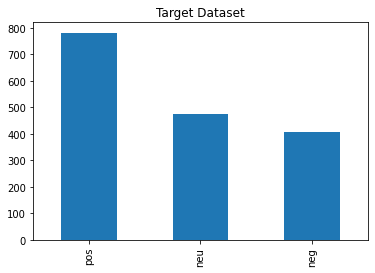

In [ ]:
#knowing dataset counts
target = df['ytrue'].value_counts()
target.plot(kind='bar', title='Target Dataset')

#show dataset
target

In [ ]:
#balancing dataset
class_0, class_1, class_2= df['label_id'].value_counts()

class_0, class_1, class_2

(781, 474, 407)

Random samping: 
pos    407
neg    407
neu    407
Name: ytrue, dtype: int64
Total sentences:  1221


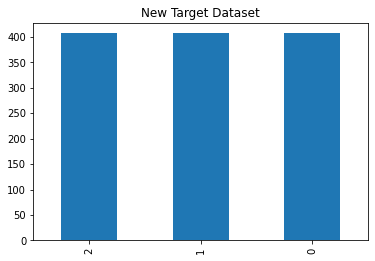

In [ ]:
dataset_class_0 = df[df['label_id'] == 0]
dataset_class_1 = df[df['label_id'] == 1]
dataset_class_2 = df[df['label_id'] == 2]

#making dataset as much as label 2
dataset_class_0 = dataset_class_0.sample(class_2)
dataset_class_1 = dataset_class_1.sample(class_2)
dataset_class_2 = dataset_class_2.sample(class_2)


df = pd.concat([dataset_class_0, dataset_class_1, dataset_class_2], axis=0)

print("Random samping: ")
print(df.ytrue.value_counts())

df.label_id.value_counts().plot(kind='bar', title='New Target Dataset')
print('Total sentences: ', len(df))

In [ ]:
df

,text,ytrue,label_id
768,halo admin ini sudah tanggal iya mohon penyele...,neg,0
378,mohon cepat iya min itu barang sudah hari di s...,neg,0
1209,benar temanku juga pernah begini urusan dengan...,neg,0
1384,resi paket sudah berhari hari tidak di antar k...,neg,0
55,kompensasi ganti ruginya sampai sekarang tidak...,neg,0
...,...,...,...
336,lebih baik jajan cendol,neu,2
1075,hai kak mohon maaf atas keterlambatan respon s...,neu,2
1080,hai kak ada yang bisa kami bantu kak jika kaka...,neu,2
382,halo min cek direct message iya,neu,2


In [ ]:
#checking dataset value
label = df['label_id'].values
text = df['text'].values

print('Value of [label_id]:', label, "\n")
print('Value of [text]:', text)

Value of [label_id]: [0 0 0 ... 2 2 2] 

Value of [text]: ['halo admin ini sudah tanggal iya mohon penyelesaiannya segera asal kamu tahu saja iya laki saya juga kerja di ekspedisi dan tidak pernah selelet ini menyelesaikan masalah ganti woi uang saya kalau paket saya hilang kamu patungan itu semua kurirnya buat ganti semua uang yang paketnya hilang'
 'mohon cepat iya min itu barang sudah hari di saja tidak ada perkembanganya sama sekali'
 'benar temanku juga pernah begini urusan dengan orang begitu selang beberapa hari di keroyok pas lagi di jalan'
 ...
 'hai kak ada yang bisa kami bantu kak jika kakak memiliki kendala ayo infoin nomor resinya melalui direct message kami tunggu iya terima kasih ya'
 'halo min cek direct message iya'
 'selamat pagi mohon cek direct message iya']


In [ ]:
label

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
#max features
maxfeatures = 20000

#tokenization
tokenizer = Tokenizer(num_words = maxfeatures)
tokenizer.fit_on_texts(text)

In [ ]:
#max sequential per word in NN
maxseqlen = max([len(i.split()) for i in text])
print(maxseqlen)

53


In [ ]:
X = tokenizer.texts_to_sequences(text)
X = pad_sequences(X, maxlen = maxseqlen)
y = to_categorical(label, num_classes = 3)

print("Shape of data tensor ['text']:", X.shape)
print("Shape of data tensor ['label']:", y.shape)

Shape of data tensor ['text']: (1221, 53)
Shape of data tensor ['label']: (1221, 3)


In [ ]:
#tokening word index
idx_token = tokenizer.word_index
idx_token

{'anteraja': 1,
 'kak': 2,
 'iya': 3,
 'tidak': 4,
 'mohon': 5,
 'paket': 6,
 'ini': 7,
 'cepat': 8,
 'banget': 9,
 'di': 10,
 'kami': 11,
 'terima': 12,
 'dan': 13,
 'yang': 14,
 'kasih': 15,
 'sudah': 16,
 'untuk': 17,
 'saya': 18,
 'maaf': 19,
 'atas': 20,
 'pakai': 21,
 'dari': 22,
 'sampai': 23,
 'kalau': 24,
 'ada': 25,
 'sih': 26,
 'menunggu': 27,
 'akan': 28,
 'saja': 29,
 'proses': 30,
 'ke': 31,
 'hai': 32,
 'message': 33,
 'juga': 34,
 'direct': 35,
 'kakak': 36,
 'pengiriman': 37,
 'baik': 38,
 'tim': 39,
 'bisa': 40,
 'resolusi': 41,
 'nya': 42,
 'hari': 43,
 'kurir': 44,
 'dapat': 45,
 'up': 46,
 'sama': 47,
 'memang': 48,
 'mantap': 49,
 'aku': 50,
 'nomor': 51,
 'agar': 52,
 'lagi': 53,
 'kendalanya': 54,
 'itu': 55,
 'kesediaannya': 56,
 'saat': 57,
 'resi': 58,
 'kirim': 59,
 'mau': 60,
 'tanggal': 61,
 'min': 62,
 'lebih': 63,
 'ramah': 64,
 'kamu': 65,
 'bantu': 66,
 'hilang': 67,
 'jam': 68,
 'dengan': 69,
 'masih': 70,
 'dalam': 71,
 'kepada': 72,
 'paketnya': 73,

In [ ]:
#determine vocab data used
vocab = max([len(idx_token)]) + 1
vocab

2729

In [ ]:
#initializer
initializer = initializers.RandomUniform(minval = -0.05, maxval = 0.05, seed = 2)

#split dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.15, random_state = 128)

print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(1037, 53) (1037, 3)
(184, 53) (184, 3)


In [ ]:
X

array([[   0,    0,    0, ...,   14,   73,   67],
       [   0,    0,    0, ..., 1262,   47,  113],
       [   0,    0,    0, ...,   53,   10,  285],
       ...,
       [   0,    0,    0, ...,   12,   15,  119],
       [   0,    0,    0, ...,   35,   33,    3],
       [   0,    0,    0, ...,   35,   33,    3]], dtype=int32)

In [ ]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
#architecture model of BiLSTM
model = Sequential()
model.add(Embedding(input_dim = maxfeatures, output_dim = 128, input_length = maxseqlen, embeddings_initializer = initializer))
model.add(Bidirectional(LSTM(200, return_sequences = True, kernel_initializer = initializer)))
model.add(GlobalMaxPool1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))


opt = tensorflow.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 53, 128)           2560000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 53, 400)          526400    
 nal)                                                            
                                                                 
 global_max_pooling1d_5 (Glo  (None, 400)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_20 (Dense)            (None, 64)                25664     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 32)               

In [ ]:
#declare checkpoint variable and early stopping to get best model
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 3)

In [ ]:
#training model
start_time = datetime.now()
history = model.fit(Xtrain, ytrain,
                    batch_size = 8, epochs = 25, shuffle = True,
                    validation_split = 0.1, verbose = 1,
                    callbacks=early_stop)
end_time = datetime.now()
print("Time out: {}".format(end_time - start_time))

Epoch 1/25
117/117 [==============================] - 10s 46ms/step - loss: 1.0622 - accuracy: 0.4823 - val_loss: 0.8281 - val_accuracy: 0.6923
Epoch 2/25
117/117 [==============================] - 4s 34ms/step - loss: 0.6798 - accuracy: 0.7363 - val_loss: 0.5807 - val_accuracy: 0.7596
Epoch 3/25
117/117 [==============================] - 4s 33ms/step - loss: 0.4855 - accuracy: 0.8114 - val_loss: 0.5831 - val_accuracy: 0.7885
Epoch 4/25
117/117 [==============================] - 4s 33ms/step - loss: 0.3830 - accuracy: 0.8617 - val_loss: 0.5535 - val_accuracy: 0.7692
Epoch 5/25
117/117 [==============================] - 4s 33ms/step - loss: 0.2940 - accuracy: 0.9003 - val_loss: 0.6024 - val_accuracy: 0.8173
Epoch 6/25
117/117 [==============================] - 4s 33ms/step - loss: 0.2735 - accuracy: 0.9175 - val_loss: 0.5803 - val_accuracy: 0.8077
Epoch 7/25
117/117 [==============================] - 4s 33ms/step - loss: 0.2270 - accuracy: 0.9443 - val_loss: 0.5979 - val_accuracy: 0.826

In [ ]:
#build eveluation function
def evaluation(model, X, Y):
  global Y_pred, Y_act
  Y_pred = model.predict(X)
  Y_pred_class = np.argmax(Y_pred, axis=1)
  rounded_labels=np.argmax(Y, axis=1)
  Y_act = rounded_labels
  
  accuracy = accuracy_score(Y_act, Y_pred_class)
  return accuracy

In [ ]:
accuracy = evaluation(model, Xtest, ytest)
print('accuracy: %.3f' % (accuracy * 100), '%')

accuracy: 83.696 %


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("confusion matrix: \n", confusion_matrix(Y_act, np.argmax(Y_pred, axis = 1)))

# Accuracy
print("accuracy: ", accuracy_score(Y_act, np.argmax(Y_pred, axis = 1)))

# Recall
from sklearn.metrics import recall_score
print("recall: ", recall_score(Y_act, np.argmax(Y_pred, axis = 1), average=None))

# Precision
from sklearn.metrics import precision_score
print("precission: ", precision_score(Y_act, np.argmax(Y_pred, axis = 1), average=None))

confusion matrix: 
 [[45  3  8]
 [ 4 51  5]
 [ 9  1 58]]
accuracy:  0.8369565217391305
recall:  [0.80357143 0.85       0.85294118]
precission:  [0.77586207 0.92727273 0.81690141]


In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# saving pickle and h5 model
import pickle
with open('/content/drive/MyDrive/College/Careers/Accepted Job/04 Solusi247 - Data Scientist/Jobs/datas and guidelines/bilstm-anteraja.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

model.save('/content/drive/MyDrive/College/Careers/Accepted Job/04 Solusi247 - Data Scientist/Jobs/datas and guidelines/bilstm-anteraja.h5')

In [ ]:
# load model
model = load_model('/content/drive/MyDrive/College/Careers/Accepted Job/04 Solusi247 - Data Scientist/Jobs/datas and guidelines/bilstm-anteraja.h5')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 53, 128)           2560000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 53, 400)          526400    
 nal)                                                            
                                                                 
 global_max_pooling1d_5 (Glo  (None, 400)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_20 (Dense)            (None, 64)                25664     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 32)               

In [ ]:
#new data
test = ['paket gw dibobol dong',
        'aduh ekspedisi ruwet banget',
        'kurir baik',
        'ongkir ekspedisi berapa min',
        'cek dm dong elah min',
        'eh udah nyampe, cepet bener dah'
]

#expected
#neg, neg, pos, neu, neu, pos

In [ ]:
#tokenizing newdata
newdata = tokenizer.texts_to_sequences(test)
newdata = pad_sequences(newdata, maxlen = maxseqlen)

In [ ]:
model_predict = model.predict(newdata)
model_label = np.argmax(model_predict, axis = 1)
model_probability = model_predict.max(axis = 1)

In [ ]:
#proccess model into prediction and probability of newdata
model_labeled = []
model_sentence = []
model_probabilities = []
for model_unlabeled, model_label, model_probability in zip(test, model_label, model_probability):
  print('"{}"'.format(model_unlabeled))
  u = model_unlabeled
  l = id_to_kategori[model_label]
  model_labeled.append(l)
  model_sentence.append(u)
  model_probabilities.append(model_probability)

  print("  - Prediction: '{}'".format(id_to_kategori[model_label]))
  print("  - Probability: '{}'".format(model_probability))
  print("")

"paket gw dibobol dong"
  - Prediction: 'neu'
  - Probability: '0.9854977130889893'

"aduh ekspedisi ruwet banget"
  - Prediction: 'neg'
  - Probability: '0.9999978542327881'

"kurir baik"
  - Prediction: 'neu'
  - Probability: '0.9238272309303284'

"ongkir ekspedisi berapa min"
  - Prediction: 'neu'
  - Probability: '0.9875701069831848'

"cek dm dong elah min"
  - Prediction: 'neu'
  - Probability: '0.9999734163284302'

"eh udah nyampe, cepet bener dah"
  - Prediction: 'neu'
  - Probability: '0.8872401714324951'

